In [2]:
!pip install tensorflow

     -------------------------------------- 266.3/266.3 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 439.9 kB/s eta 0:00:00
     ---------------------------------------- 14.2/14.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 3.3 MB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 298.5 kB/s eta 0:00:00
     -------------------------------------- 124.6/124.6 kB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 1.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 1.9 MB/s eta 0:00:00
     ------------------------------------ 175.4/175.4 kB 320.0 kB/s eta 0:00:00
     ------------------------------------ 781.

In [4]:
# file operations
import os
# to list files
import glob

# for numerical analysis
import numpy as np 
# to store and process in a dataframe
import pandas as pd 

# for ploting graphs
import matplotlib.pyplot as plt
# advancec ploting
import seaborn as sns

# image processing
import matplotlib.image as mpimg

# train test split
from sklearn.model_selection import train_test_split
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report

# utility functions
from tensorflow.keras.utils import to_categorical, plot_model
# process image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
# sequential model
from tensorflow.keras.models import Sequential
# layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [5]:
# list of files in the dataset
os.listdir(r'C:\Users\Pramod kumar gond\Desktop\MINOR\cell_images')

['Parasitized', 'Uninfected']

In [6]:
# list all the images in the directory Parasitized
parasitized = glob.glob(r'C:\Users\Pramod kumar gond\Desktop\MINOR\cell_images\Parasitized\*.png')
# print(parasitized)

# no. of files in the directory Parasitized
print('No. of files in the directory Parasitized', len(parasitized))

# first few images
parasitized[:5]

No. of files in the directory Parasitized 13779


['C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Parasitized\\C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [7]:
# list all the images in the directory Uninfected
uninfected = glob.glob(r'C:\Users\Pramod kumar gond\Desktop\MINOR\cell_images\Uninfected\*.png')

# no. of files in the directory Uninfected
print('No. of files in the directory Uninfected', len(uninfected))

# first few images
uninfected[:5]

No. of files in the directory Uninfected 13779


['C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C:\\Users\\Pramod kumar gond\\Desktop\\MINOR\\cell_images\\Uninfected\\C100P61ThinF_IMG_20150918_144104_cell_25.png']

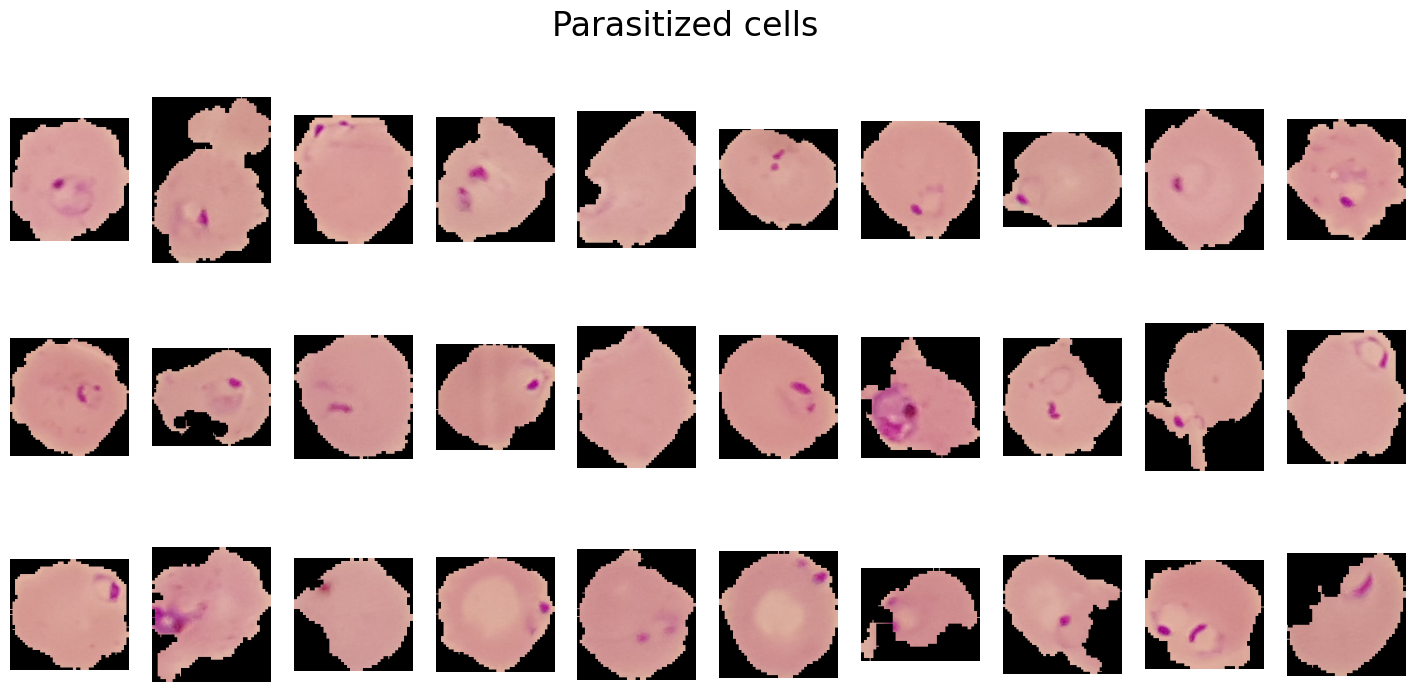

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Parasitized cells', fontsize=24)

for ind, img_src in enumerate(parasitized[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

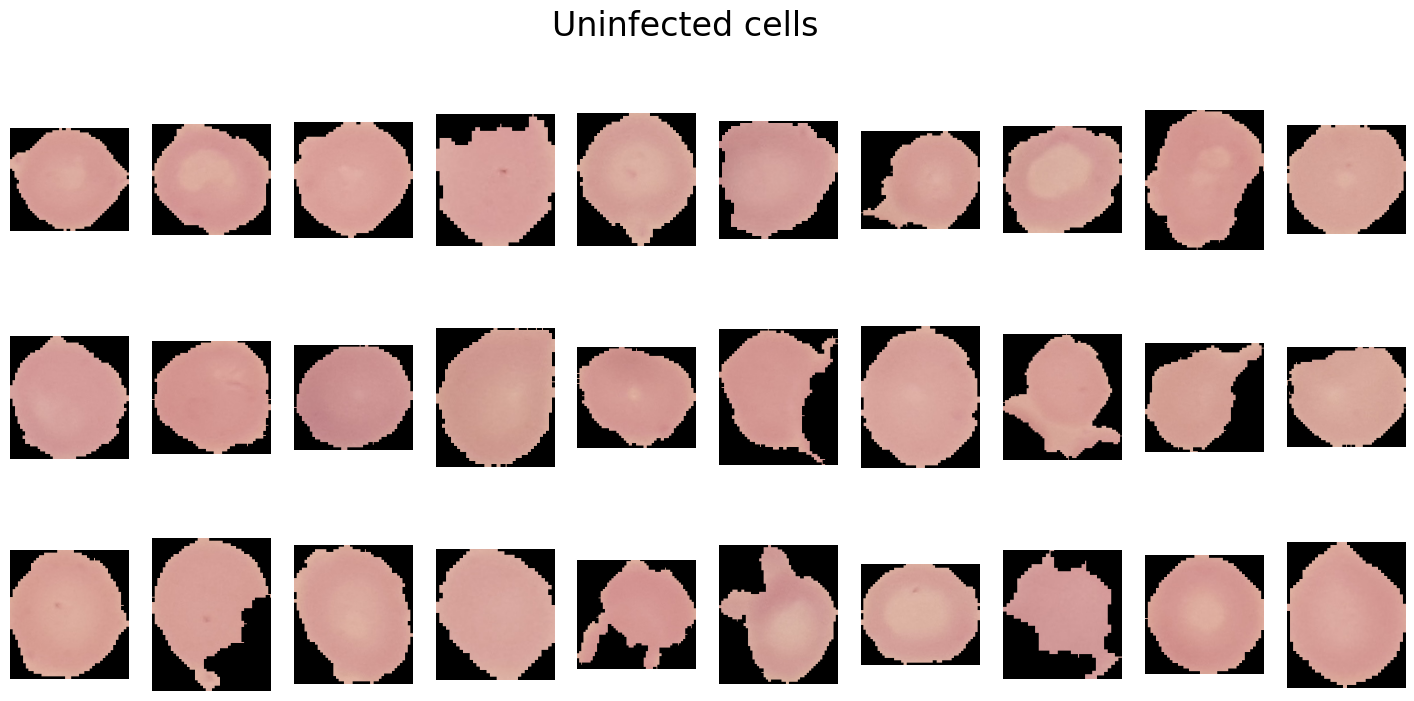

In [9]:
fig, ax = plt.subplots(figsize=(18, 8))
fig.suptitle('Uninfected cells', fontsize=24)

for ind, img_src in enumerate(uninfected[:30]):
    plt.subplot(3, 10, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.imshow(img)

In [10]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels
TARGET_SIZE = 64
EPOCHS = 15

In [11]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [12]:
plt.figure(figsize=(5, 10))
plot_model(model, to_file="model.png")

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


<Figure size 500x1000 with 0 Axes>

In [18]:
!pip install pydot
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00


In [13]:
datagen = ImageDataGenerator(rescale=1./255,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             validation_split=0.3)

train_data = datagen.flow_from_directory(r'C:\Users\Pramod kumar gond\Desktop\MINOR\cell_images',
                                         target_size=(IMG_SHAPE,IMG_SHAPE),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode='binary',
                                         subset='training')

validation_data = datagen.flow_from_directory(r'C:\Users\Pramod kumar gond\Desktop\MINOR\cell_images',
                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                              batch_size=BATCH_SIZE,
                                              shuffle=True,
                                              class_mode='binary',
                                              subset='validation')

Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [14]:
# Instantiate an early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', 
                               min_delta = 0.01,
                               patience=5)

# Instantiate a model checkpoint callback
model_save = ModelCheckpoint('best_model.hdf5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True)

In [15]:
history = model.fit(train_data,
                    validation_data=validation_data,
                    epochs=EPOCHS,
                    verbose=1, 
                    callbacks=[early_stopping, model_save])

Epoch 1/15
193/193 [==============================] - 490s 3s/step - loss: 0.5912 - accuracy: 0.7048 - val_loss: 0.3822 - val_accuracy: 0.8562
Epoch 2/15
193/193 [==============================] - 433s 2s/step - loss: 0.3549 - accuracy: 0.8758 - val_loss: 0.2793 - val_accuracy: 0.9065
Epoch 3/15
193/193 [==============================] - 435s 2s/step - loss: 0.2434 - accuracy: 0.9187 - val_loss: 0.2363 - val_accuracy: 0.9119
Epoch 4/15
193/193 [==============================] - 432s 2s/step - loss: 0.2351 - accuracy: 0.9229 - val_loss: 0.2333 - val_accuracy: 0.9199
Epoch 5/15
193/193 [==============================] - 431s 2s/step - loss: 0.2226 - accuracy: 0.9284 - val_loss: 0.2336 - val_accuracy: 0.9082
Epoch 6/15
193/193 [==============================] - 431s 2s/step - loss: 0.2234 - accuracy: 0.9274 - val_loss: 0.2377 - val_accuracy: 0.9041
Epoch 7/15
193/193 [==============================] - 429s 2s/step - loss: 0.2181 - accuracy: 0.9273 - val_loss: 0.2110 - val_accuracy: 0.9203

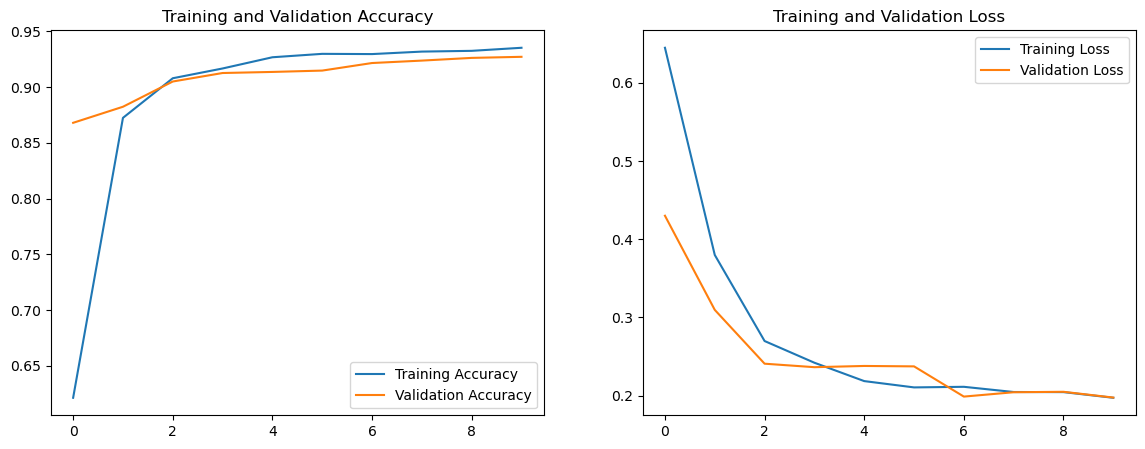

In [25]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()